# Test sample_quality.py functions

In [40]:
from scipy.stats import multivariate_normal as mvn
import numpy as np
import matplotlib.pyplot as plt

import sample_quality as sq
import functions as fn

import importlib
importlib.reload(sq)
# https://www.geeksforgeeks.org/reloading-modules-python/

<module 'sample_quality' from 'C:\\Users\\hechu\\Documents\\GitHub\\MClib\\MCLibPy\\sample_quality.py'>

## Measures

### ESS

$$ESS = \sum_{m}\frac{1}{{w^{(m)}}^2}$$
ESS is between 1 and N. We can devide it by N to normalize ESS over sample size

$$\frac{ESS}{N} = \frac{1}{N} \sum_{m}\frac{1}{{w^{(m)}}^2}$$

## Quality vs shift

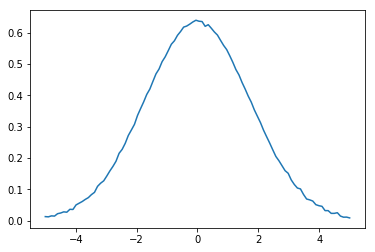

In [50]:
# define target function
D = 2
pi = lambda x: mvn.logpdf(x, mean=0*np.ones(shape=D),cov=np.eye(D))

# define sampling process
def sample(tau):
    N = 10000
    mu = np.ones(shape=D)
    mu[0] = tau
    x = mvn.rvs(mean=mu, cov=np.eye(D),size=N)
    return x
    

# define containers
ESSoverN_log = []
tau = np.linspace(-5.0,5.0,100)
for i in range(len(tau)):
    x = sample(tau[i])
    ESSoverN_log.append(sq.ESSoverN(fn.logw2w(pi(x))))
plt.figure()
plt.plot(tau, ESSoverN_log)